In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Algerian_forest_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,REgion
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'REgion'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,REgion
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

### dividing features into dependent and independent

In [10]:
X=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,REgion
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

## train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=True)

In [14]:
X_train.shape,y_train.shape

((182, 11), (182,))

## feature selection

In [15]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,REgion
Temperature,1.000000,-0.671911,-0.312275,-0.314831,0.673830,0.484580,0.384818,0.616677,0.464036,0.531654,0.239610
RH,-0.671911,1.000000,0.224166,0.170378,-0.625916,-0.420075,-0.234742,-0.682372,-0.365094,-0.432386,-0.414108
Ws,-0.312275,0.224166,1.000000,0.187265,-0.157881,0.000907,0.107078,-0.021741,0.038890,-0.107588,-0.225723
Rain,-0.314831,0.170378,0.187265,1.000000,-0.549023,-0.324219,-0.338162,-0.368030,-0.337562,-0.405860,-0.013129
FFMC,0.673830,-0.625916,-0.157881,-0.549023,1.000000,0.617558,0.533333,0.739043,0.608624,0.773164,0.228586
DMC,0.484580,-0.420075,0.000907,-0.324219,0.617558,1.000000,0.867133,0.710137,0.982752,0.595078,0.197720
DC,0.384818,-0.234742,0.107078,-0.338162,0.533333,0.867133,1.000000,0.551400,0.942131,0.554098,-0.103487
ISI,0.616677,-0.682372,-0.021741,-0.368030,0.739043,0.710137,0.551400,1.000000,0.672751,0.718546,0.250912
BUI,0.464036,-0.365094,0.038890,-0.337562,0.608624,0.982752,0.942131,0.672751,1.000000,0.600088,0.091172
Classes,0.531654,-0.432386,-0.107588,-0.405860,0.773164,0.595078,0.554098,0.718546,0.600088,1.000000,0.128136


### check for multicolinearity

<Axes: >

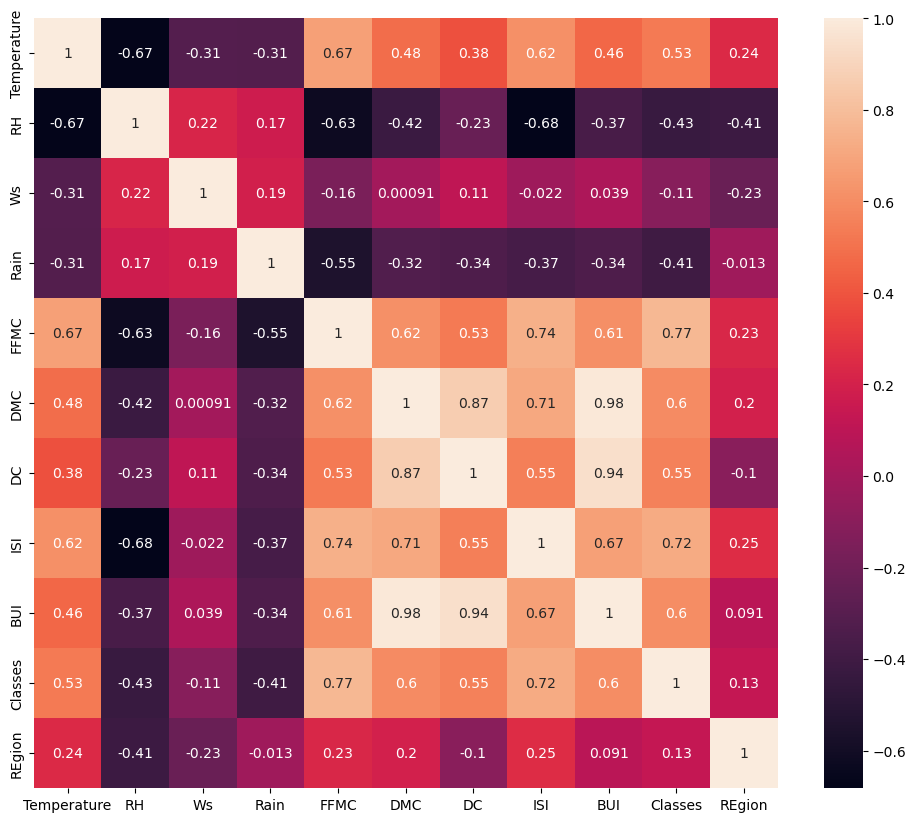

In [16]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [17]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features=correlation(X_train,0.85)

drop feature where corelation >0.85

In [19]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [20]:
X_train.shape,y_train.shape

((182, 9), (182,))

## feature scaling or standardization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[-2.33325652, -0.53226506,  0.92385258, ..., -0.76087225,
        -1.19443152,  0.96755889],
       [ 0.21976564,  0.40889481, -0.19460309, ...,  0.08557487,
         0.83721836,  0.96755889],
       [ 1.07077303, -0.53226506,  0.92385258, ...,  1.17386403,
         0.83721836, -1.03352882],
       ...,
       [-0.06390349,  0.34166911, -0.56742165, ..., -0.93016167,
        -1.19443152,  0.96755889],
       [ 0.7871039 , -0.39781365, -0.56742165, ...,  0.64181155,
         0.83721836,  0.96755889],
       [ 0.21976564,  0.40889481,  1.29667113, ...,  0.2790485 ,
         0.83721836, -1.03352882]])

### box plot

Text(0.5, 1.0, 'X train after scaling')

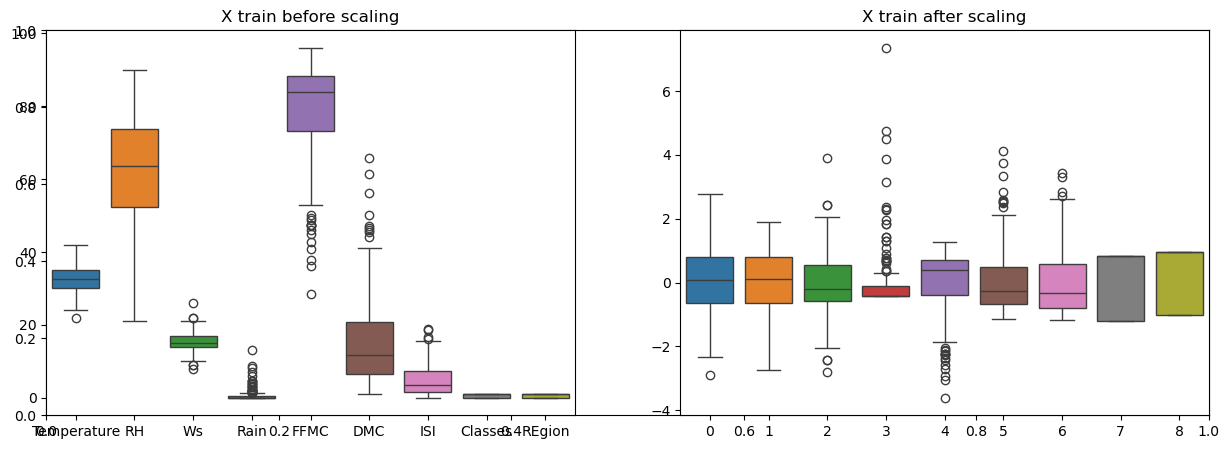

In [23]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train after scaling')

## Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [27]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)

In [28]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)

mean_absolute_error =  0.7276922407181161
R2 Score =  0.9770110704661447


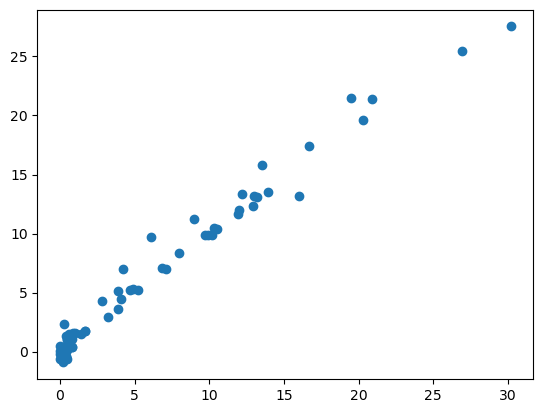

In [29]:
plt.scatter(y_test,y_pred)

## Lasso Regression 

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error

In [32]:
ls=Lasso()
ls.fit(X_train_scaled,y_train)
y_pred=ls.predict(X_test_scaled)

mean_absolute_error =  1.1682708134892337
R2 Score =  0.9487946726145268


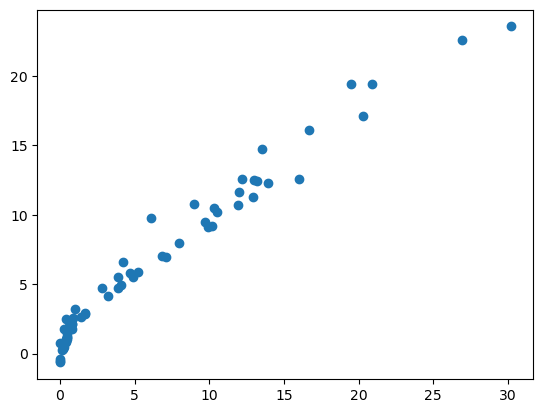

In [33]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

## Cross validation - Lasso

In [42]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,mean_absolute_error

In [47]:
lscv=LassoCV(cv=5)
lscv.fit(X_train_scaled,y_train)
y_pred=lscv.predict(X_test_scaled)


mean_absolute_error =  0.7521151198934399
R2 Score =  0.9765676210957288


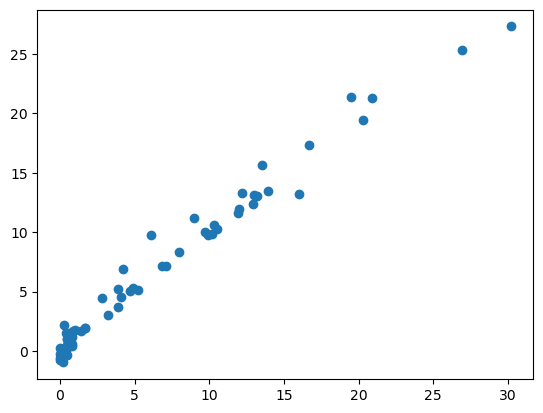

In [48]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error

In [37]:
rg=Ridge()
rg.fit(X_train_scaled,y_train)
y_pred=rg.predict(X_test_scaled)

mean_absolute_error =  0.7291793625219977
R2 Score =  0.9769566937468053


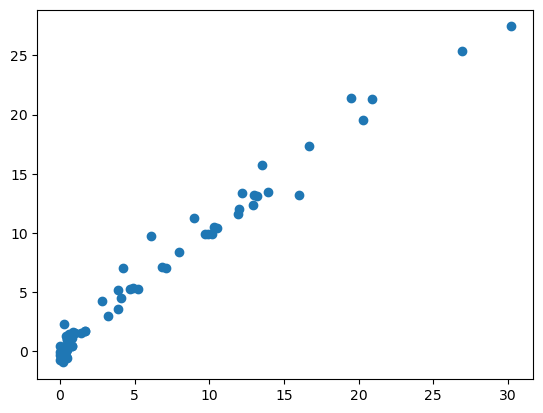

In [38]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

## Cross validation - Ridge

In [49]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_absolute_error

In [53]:
rgcv=RidgeCV(cv=5)
rgcv.fit(X_train_scaled,y_train)
y_pred=rgcv.predict(X_test_scaled)

mean_absolute_error =  0.7291793625219977
R2 Score =  0.9769566937468053


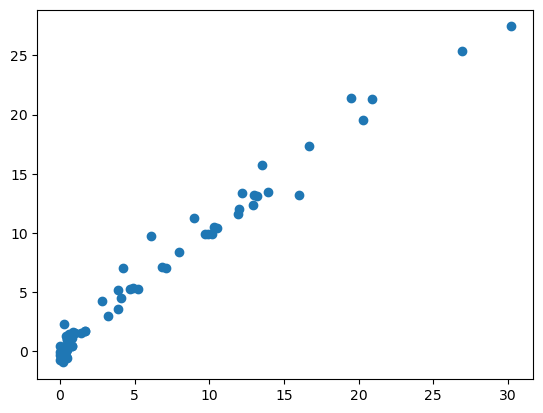

In [54]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

In [57]:
rgcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elastic Net Regression

In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error

In [40]:
en=ElasticNet()
en.fit(X_train_scaled,y_train)
y_pred=en.predict(X_test_scaled)

mean_absolute_error =  1.6785193445698199
R2 Score =  0.8968848365302442


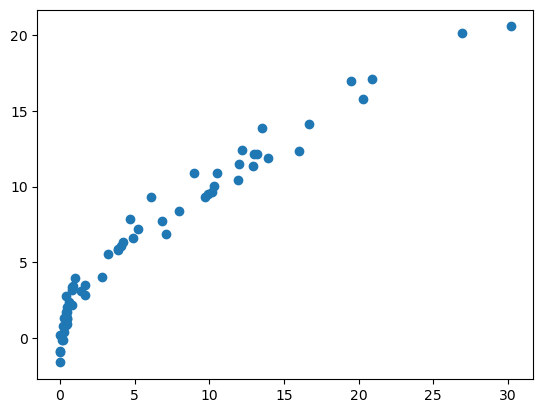

In [41]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

### Cross Validation - Elastic Net

In [59]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,mean_absolute_error

In [62]:
encv=ElasticNetCV(cv=5)
encv.fit(X_train_scaled,y_train)
y_pred=encv.predict(X_test_scaled)

mean_absolute_error =  0.7402650778155782
R2 Score =  0.9766285891897818


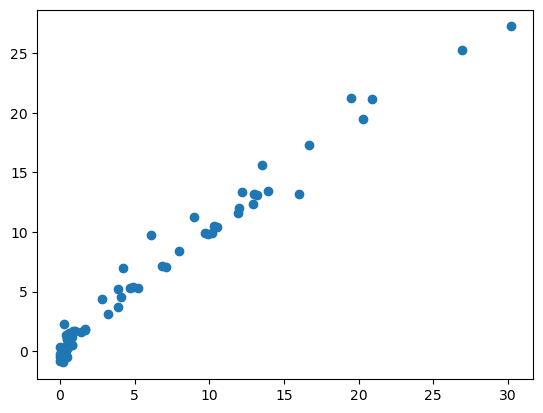

In [63]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean_absolute_error = ",mae)
print("R2 Score = ",r2)
plt.scatter(y_test,y_pred)

In [64]:
encv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}